In [2]:
import pandas as pd
import os
import re
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('D:/abstract/wos_0531/bib_360446/unique_multilabel_withlabel.csv', engine='python')
df2 = pd.read_csv('D:/abstract/wos_0531/bib_360446/dropna_abstract_334765.csv', engine='python')

In [3]:
df1

,Abstract,topic,Research Areas,label,index
0,This paper presents an updated checklist of ma...,13,Marine & Freshwater Biology; Oceanography,Marine & Freshwater Biology,3
1,Small time behavior of gravity driven free sur...,16,Engineering; Oceanography,Engineering,2
2,This Collective Article includes records of 29...,13,Fisheries; Geology; Marine & Freshwater Biolog...,Marine & Freshwater Biology,3
3,This Collective Article presents information a...,13,Fisheries; Geology; Marine & Freshwater Biolog...,Marine & Freshwater Biology,3
4,The use of pesticides in agriculture has alway...,73,Engineering; Oceanography,Engineering,2
...,...,...,...,...,...
334760,The simplicity of the hydrochemical stationari...,40,Engineering; Geology; Water Resources,Water Resources,5
334761,In many smallholder farms in sub-Saharan Afric...,40,Geology; Meteorology & Atmospheric Sciences; W...,Water Resources,5
334762,In this study we tested whether we can use a t...,0,Environmental Sciences & Ecology; Remote Sensing,Geology,4
334763,A novel approach of using variability as a maj...,69,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,1


In [3]:
year = df2['Publication Year']
label = df1['index']

In [5]:
year

0         2021.0
1         2021.0
2         2021.0
3         2021.0
4         2020.0
           ...  
334760    2017.0
334761    2016.0
334762    2015.0
334763    2009.0
334764    2008.0
Name: Publication Year, Length: 334765, dtype: float64

In [4]:
arr = np.zeros((30,7), dtype=np.int)
year_7classes = pd.DataFrame(arr, columns=['Science & Technology - Other Topics',
                                     'Meteorology & Atmospheric Sciences',
                                     'Engineering',
                                     'Marine & Freshwater Biology',
                                     'Geology',
                                     'Water Resources',
                                     'Geochemistry & Geophysics'])
for i in range(len(year)):
    if year[i]<2022 and not math.isnan(year[i]):
        year_7classes.iloc[int(year[i])-1992,label[i]] += 1

C:\Users\Velaciela\AppData\Local\Temp\ipykernel_87964\3871019617.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = np.zeros((30,7), dtype=np.int)


In [34]:
year_7classes.to_csv('D:/abstract/wos_0531/bib_360446/year_7classes.csv', index=False)

In [5]:
for i in range(30):
    year_7classes.loc[i, 'Total'] = year_7classes.iloc[i, 0]+year_7classes.iloc[i, 1]+year_7classes.iloc[i, 2]+year_7classes.iloc[i, 3]+year_7classes.iloc[i, 4]+year_7classes.iloc[i, 5]+year_7classes.iloc[i, 6]

In [6]:
year_7classes['Total'] = year_7classes['Total'].astype(int)

In [43]:
year_7classes.to_csv('D:/abstract/wos_0531/bib_360446/year_7classes.csv', index=False)

In [44]:
year_7classes

,Science & Technology - Other Topics,Meteorology & Atmospheric Sciences,Engineering,Marine & Freshwater Biology,Geology,Water Resources,Geochemistry & Geophysics,Total
0,235,417,521,1324,515,55,152,3219
1,230,494,563,1228,522,63,216,3316
2,250,520,597,1494,495,58,246,3660
3,252,524,514,1713,485,56,215,3759
4,321,665,773,1767,509,65,253,4353
5,339,762,1090,1983,832,119,300,5425
6,316,795,1156,1894,870,165,298,5494
7,349,863,1176,1898,994,163,251,5694
8,335,1338,1150,1941,1475,337,287,6863
9,351,982,1360,2027,1265,309,277,6571


In [7]:
arr = np.zeros((30,7), dtype=np.int)
year_7classes_p = pd.DataFrame(arr, columns=['Science & Technology - Other Topics',
                                     'Meteorology & Atmospheric Sciences',
                                     'Engineering',
                                     'Marine & Freshwater Biology',
                                     'Geology',
                                     'Water Resources',
                                     'Geochemistry & Geophysics'])
for i in range(30):
    for j in range(7):
        year_7classes_p.iloc[i,j] = year_7classes.iloc[i,j]/year_7classes.loc[i,'Total']

C:\Users\Velaciela\AppData\Local\Temp\ipykernel_87964\2168232084.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = np.zeros((30,7), dtype=np.int)


In [8]:
year_7classes_p

,Science & Technology - Other Topics,Meteorology & Atmospheric Sciences,Engineering,Marine & Freshwater Biology,Geology,Water Resources,Geochemistry & Geophysics
0,0.073004,0.129543,0.161852,0.411308,0.159988,0.017086,0.047220
1,0.069361,0.148975,0.169783,0.370326,0.157419,0.018999,0.065139
2,0.068306,0.142077,0.163115,0.408197,0.135246,0.015847,0.067213
3,0.067039,0.139399,0.136738,0.455706,0.129024,0.014898,0.057196
4,0.073742,0.152768,0.177579,0.405927,0.116931,0.014932,0.058121
5,0.062488,0.140461,0.200922,0.365530,0.153364,0.021935,0.055300
6,0.057517,0.144703,0.210411,0.344740,0.158355,0.030033,0.054241
7,0.061293,0.151563,0.206533,0.333333,0.174570,0.028627,0.044081
8,0.048812,0.194958,0.167565,0.282821,0.214921,0.049104,0.041818
9,0.053417,0.149445,0.206970,0.308477,0.192513,0.047025,0.042155


In [9]:
year_7classes_p.to_csv('D:/abstract/wos_0531/bib_360446/year_7classes_p.csv',index=False)

In [10]:
x = []
for i in range(1992,2022):
    x.append(i)
y1 = year_7classes_p['Science & Technology - Other Topics']
y2 = year_7classes_p['Meteorology & Atmospheric Sciences']
y3 = year_7classes_p['Engineering']
y4 = year_7classes_p['Marine & Freshwater Biology']
y5 = year_7classes_p['Geology']
y6 = year_7classes_p['Water Resources']
y7 = year_7classes_p['Geochemistry & Geophysics']

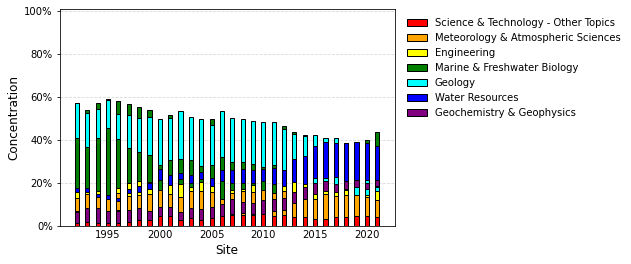

In [58]:
plt.bar(x,y1,width=0.4,label='Science & Technology - Other Topics',color='red',edgecolor='black',zorder=5)
plt.bar(x,y2,width=0.4,bottom=y1,label='Meteorology & Atmospheric Sciences',color='orange',edgecolor='black',zorder=5)
plt.bar(x,y3,width=0.4,bottom=y2,label='Engineering',color='yellow',edgecolor='black',zorder=5)
plt.bar(x,y4,width=0.4,bottom=y3,label='Marine & Freshwater Biology',color='green',edgecolor='black',zorder=5)
plt.bar(x,y5,width=0.4,bottom=y4,label='Geology',color='cyan',edgecolor='black',zorder=5)
plt.bar(x,y6,width=0.4,bottom=y5,label='Water Resources',color='blue',edgecolor='black',zorder=5)
plt.bar(x,y7,width=0.4,bottom=y6,label='Geochemistry & Geophysics',color='purple',edgecolor='black',zorder=5)
plt.tick_params(axis='x',length=0)
plt.xlabel('Site',fontsize=12)
plt.ylabel('Concentration',fontsize=12)
plt.ylim(0,1.01)
plt.yticks(np.arange(0,1.2,0.2),[f'{i}%' for i in range(0,120,20)])
plt.grid(axis='y',alpha=0.5,ls='--')
# 添加图例，将图例移至图外
plt.legend(frameon=False,bbox_to_anchor=(1.01,1))
#plt.tight_layout()
#plt.savefig('bar2.png', dpi=600)
plt.show()

In [3]:
year_7classes_p = pd.read_csv('D:/abstract/wos_0531/bib_360446/year_7classes_p.csv',engine='python')
for i in range(len(year_7classes_p)):
    for j in range(7):
        year_7classes_p.iloc[i,j]=round(year_7classes_p.iloc[i,j]*100,2)
        #year_7classes_p.iloc[i,j]=str(round(year_7classes_p.iloc[i,j]*100,2))+'%'
year_7classes_p

,Science & Technology - Other Topics,Meteorology & Atmospheric Sciences,Engineering,Marine & Freshwater Biology,Geology,Water Resources,Geochemistry & Geophysics
0,7.30,12.95,16.19,41.13,16.00,1.71,4.72
1,6.94,14.90,16.98,37.03,15.74,1.90,6.51
2,6.83,14.21,16.31,40.82,13.52,1.58,6.72
3,6.70,13.94,13.67,45.57,12.90,1.49,5.72
4,7.37,15.28,17.76,40.59,11.69,1.49,5.81
5,6.25,14.05,20.09,36.55,15.34,2.19,5.53
6,5.75,14.47,21.04,34.47,15.84,3.00,5.42
7,6.13,15.16,20.65,33.33,17.46,2.86,4.41
8,4.88,19.50,16.76,28.28,21.49,4.91,4.18
9,5.34,14.94,20.70,30.85,19.25,4.70,4.22


7


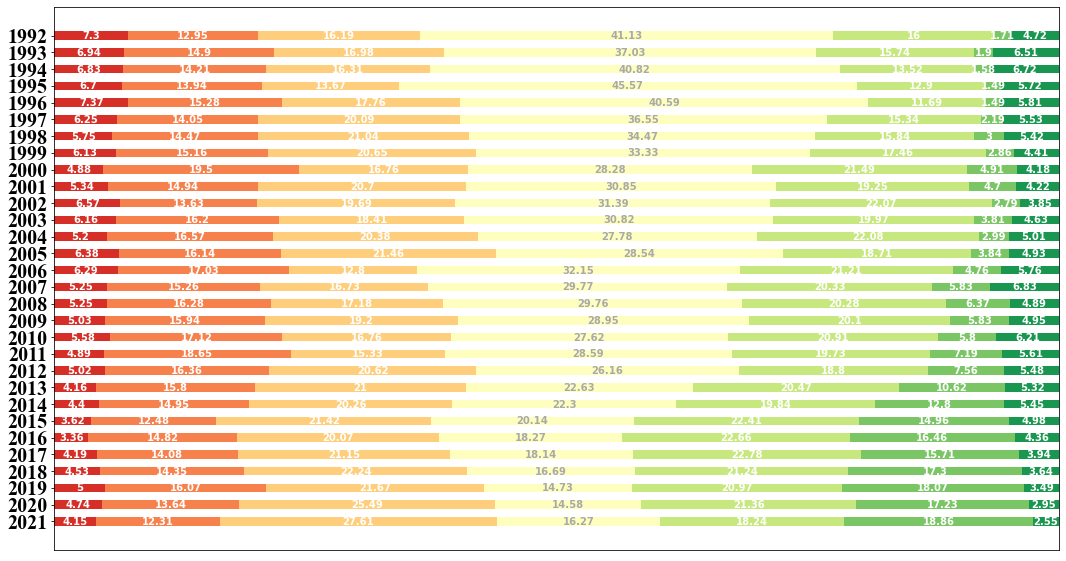

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.weight"]='bold'
#year_7classes_p = pd.read_csv('D:/abstract/wos_0531/bib_360446/year_7classes_p.csv',engine='python')
category_names = ['Science & Technology - Other Topics',
                                     'Meteorology & Atmospheric Sciences',
                                     'Engineering',
                                     'Marine & Freshwater Biology',
                                     'Geology',
                                     'Water Resources',
                                     'Geochemistry & Geophysics']
results = dict()
#del year_7classes_p['Total']
for i in range(30):
    results[str(i+1992)] = list(year_7classes_p.iloc[i])


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.1, 0.9, data.shape[1]))
    print(data.shape[1])

    fig, ax = plt.subplots(figsize=(18, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        widths_ = [str(w)+'%' for w in widths]
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
        plt.yticks(fontproperties='Times New Roman', size=20,weight='bold')
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        #text_color = 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    #ax.legend(ncol=4, bbox_to_anchor=(0, 1),
    #          loc='lower left', fontsize=12.3, handleheight=2)

    return fig, ax


survey(results, category_names)
plt.show()

In [32]:
results

{'1992': [7.3, 12.95, 16.19, 41.13, 16.0, 1.71, 4.72],
 '1993': [6.94, 14.9, 16.98, 37.03, 15.74, 1.9, 6.51],
 '1994': [6.83, 14.21, 16.31, 40.82, 13.52, 1.58, 6.72],
 '1995': [6.7, 13.94, 13.67, 45.57, 12.9, 1.49, 5.72],
 '1996': [7.37, 15.28, 17.76, 40.59, 11.69, 1.49, 5.81],
 '1997': [6.25, 14.05, 20.09, 36.55, 15.34, 2.19, 5.53],
 '1998': [5.75, 14.47, 21.04, 34.47, 15.84, 3.0, 5.42],
 '1999': [6.13, 15.16, 20.65, 33.33, 17.46, 2.86, 4.41],
 '2000': [4.88, 19.5, 16.76, 28.28, 21.49, 4.91, 4.18],
 '2001': [5.34, 14.94, 20.7, 30.85, 19.25, 4.7, 4.22],
 '2002': [6.57, 13.63, 19.69, 31.39, 22.07, 2.79, 3.85],
 '2003': [6.16, 16.2, 18.41, 30.82, 19.97, 3.81, 4.63],
 '2004': [5.2, 16.57, 20.38, 27.78, 22.08, 2.99, 5.01],
 '2005': [6.38, 16.14, 21.46, 28.54, 18.71, 3.84, 4.93],
 '2006': [6.29, 17.03, 12.8, 32.15, 21.21, 4.76, 5.76],
 '2007': [5.25, 15.26, 16.73, 29.77, 20.33, 5.83, 6.83],
 '2008': [5.25, 16.28, 17.18, 29.76, 20.28, 6.37, 4.89],
 '2009': [5.03, 15.94, 19.2, 28.95, 20.1, 5.

In [51]:
rects

NameError: name 'rects' is not defined